# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [14]:
import itertools as it
from time import perf_counter
from random import randint

import numpy as np
from matplotlib import pyplot as plt

## Implementacja

In [15]:
class KnapSack:
    def __init__(self, profits, weights, capacity):
        if len(profits) != len(weights):
            raise ValueError("profits and weights arrays must be equal in length")
        self.profits = profits
        self.weights = weights
        self.capacity = capacity

    def solve_knapsack_brute_force(self) -> np.ndarray[int]:
        best_profit = 0
        best_indexes = None
        indexes = np.array(range(len(self.profits)))
        maxSize = len(self.profits) + 1

        for size in range(1, maxSize):
            for subset in it.combinations(indexes, size):
                chosen = np.array(subset).astype(int)
                if self._fits(chosen) and self.profits[chosen].sum() > best_profit:
                    best_indexes = chosen
                    best_profit = self.profits[chosen].sum()
        return best_indexes

    def solve_knapsack_pw_ratio(self) -> np.ndarray[int]:
        indexes = list(range(len(self.profits)))
        indexes.sort(key=lambda ind: self.profits[ind] / self.weights[ind], reverse=True)

        best_indexes = []
        current_weight = 0
        for i, w in zip(indexes, self.weights[indexes]):
            if w + current_weight <= self.capacity:
                best_indexes.append(i)
                current_weight += w
            if current_weight == self.capacity:
                break
        return best_indexes

    # Utility methods
    def s_profit(self, indexes):
        return sum(self.profits[indexes])

    def s_weight(self, indexes):
        return sum(self.weights[indexes])
    
    def print_answer(self, indexes):
        s = f'answer: {indexes}, total profit: {self.s_profit(indexes)}, weight: {self.s_weight(indexes)}/{self.capacity}'
        print(s)

    def _fits(self, indexes) -> bool:
        return sum(self.weights[indexes]) < self.capacity


## Porównanie

In [16]:
## set example values
profits = np.array([16, 8, 9, 6])
weights = np.array([8, 3, 5, 2])
capacity = 9

sack = KnapSack(profits, weights, capacity)

In [17]:
## brute force solution

answer_bf = sack.solve_knapsack_brute_force()
sack.print_answer(answer_bf)

answer: [1 2], total profit: 17, weight: 8/9


In [18]:
## pw heuristic solution

answer_pw = sack.solve_knapsack_pw_ratio()
sack.print_answer(answer_pw)

answer: [3, 1], total profit: 14, weight: 5/9


## Wnioski

Algorytm heurystyczny nie sprawdza wszystkich możliwości, zatem nie gwarantuje znalezienia rozwiązania optymalnego.
W tym przykładzie zwrócił rozwiązanie o wartości 14, w porównaniu do najlepszego o wartości 17 znalezionego przez metodę brute force.
Metoda brute force sprawdza wszystkie możliwe rozwiązania i gwarantuje znalezienie optimum, jednak jest o wiele bardziej kosztowna obliczeniowo.

Złożoność obliczeionwa dla n elementów w plecaku:
 - heurystyka: O(n) - liniowa
 - brute force: O(2^n) - wykładnicza

## Mierzenie brute force

In [19]:
def measure_brute_force(maxSize: int, capacity=9):
    results = []
    profits = []
    weights = []

    for size in range(1, maxSize+1):
        w = randint(1, capacity)
        p = randint(1, 3 * w)
        profits.append(p)
        weights.append(w)
        sack = KnapSack(np.array(profits), np.array(weights), capacity)

        start = perf_counter()
        sack.solve_knapsack_brute_force()
        duration = perf_counter() - start
        results.append((size, duration))

    return results


def plot_results(results):
    sizes, times = zip(*results)

    fig, ax = plt.subplots()
    ax.plot(sizes, times)

    ax.set(xlabel='item count', ylabel='time [s]',
        title='Knapsack Brute Force solving time')
    ax.grid()

    plt.show()


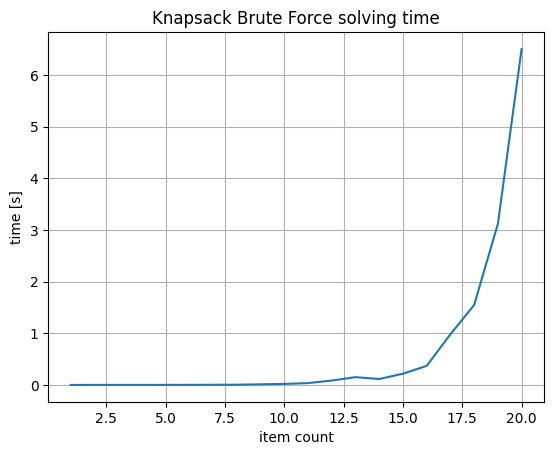

In [22]:
N = 20

r = measure_brute_force(N)
plot_results(r)